## Ход работы:
1. В ходе работы я использую данные по различным грибам определяю наиболее важные атрибуты для леса, обучил модель Random_forest определять съедомные грибы. А также проверил это на тестовых данных

In [1]:
import pandas as pd

# Библиотеки для машинного обучения
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



In [42]:
# Загрузка данных (верные ответы в поле class)
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')
X_train = df.drop('class', axis=1)
y_train = df['class']


In [43]:
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,3,1,0
6089,3,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
6090,5,2,3,0,1,1,0,1,9,0,...,7,7,0,2,1,4,3,4,0,1
6091,3,2,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0


In [44]:
# Объявляем классификатор и параметры для перебора
clf_RF = RandomForestClassifier(random_state=0)
parametrs = {'n_estimators':      range(10, 50, 10),
             'max_depth':         range(1, 12, 2),
             'min_samples_leaf':  range(1, 7),
             'min_samples_split': range(2, 9, 2)}



In [45]:
# Запускаем обучение
clf_grid = GridSearchCV(clf_RF, param_grid=parametrs, cv=3, n_jobs=-1)
clf_grid.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [46]:
# Получаем лучшие параметры от лучшей обученной модели.
print('Лучшие параметры Леса:', clf_grid.best_params_)

Лучшие параметры Леса: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [47]:
best_clf = clf_grid.best_estimator_

In [48]:
# Создадим атрибут feature_importances и сохраним его в отдельную переменную.
feature_importances = best_clf.feature_importances_

In [50]:
# и сделаем DataFrame, одна колонка - имена переменных, другая - важность переменных, отсортированные по убыванию.
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': feature_importances})\
    .sort_values(by='feature_importances', ascending=False)


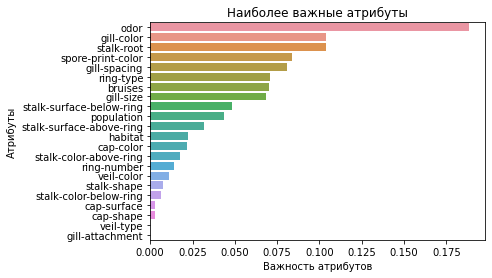

In [51]:
# Построение графика.
f, ax = plt.subplots()
sns.barplot(y=feature_importances_df.features, x=feature_importances_df.feature_importances)
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title('Наиболее важные атрибуты')
plt.show()

In [ ]:
y_pred = https://stepik.org/media/attachments/course/4852/testing_mush.csv

In [60]:
# Считываем второй файл c данными о грибах.
mush_data_2 = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

In [61]:
# Предсказываем съедобность грибов из второго файла, используя созданный наилучший классификатор.
predictions = best_clf.predict(mush_data_2)

In [63]:
pd.Series(predictions).value_counts()

0    1055
1     976
dtype: int64

In [ ]:
1. Считал invasion.csv +
2. Обозначил X и y +
3. Создал ЛЕС с критерием ДЖИНИ +
4. Задал params (1,20,1);(1,13,2);(1,8);(2,10,2) +
5. Запустил GridSearchCV(rf,params,cv=3) +
6. Обучил grid +


7. Обучил лес на X и y +

8. Обозначил best_clf (На лучших параметрах!!! .best_params_) +
10. Считал operative_information. +
11. Сделал предсказания на operative_information (+записал в y_pred)
12. s = pd.Series(y_pred)
    s.groupby(s).count()

In [2]:
# Загрузка данных (верные ответы в поле class)
Jukers = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')

In [3]:
Jukers

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [4]:
X_train = Jukers.drop('class', axis=1)
y_train = Jukers['class']

In [5]:
# Объявляем классификатор и параметры для перебора
clf_RF = RandomForestClassifier(random_state=0)
parametrs = {'n_estimators':      range(1, 20, 1),
             'max_depth':         range(1, 13, 2),
             'min_samples_leaf':  range(1, 8),
             'min_samples_split': range(2, 10, 1)}

In [6]:
# Запускаем обучение
clf_grid = GridSearchCV(clf_RF,parametrs, cv=3, n_jobs=-1)
clf_grid.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10),
                         'n_estimators': range(1, 20)})

In [7]:
# Получаем лучшие параметры от лучшей обученной модели.
print('Лучшие параметры Леса:', clf_grid.best_params_)

Лучшие параметры Леса: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 6}


In [10]:
op_inf = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

In [12]:
best_clf = clf_grid.best_estimator_

In [15]:
# Предсказываем съедобность грибов из второго файла, используя созданный наилучший классификатор.
predictions = best_clf.predict(op_inf)

In [16]:
 s = pd.Series(predictions)

In [17]:
 s.groupby(s).count()

cruiser      230
fighter      675
transport    595
dtype: int64

In [18]:
# Создадим атрибут feature_importances и сохраним его в отдельную переменную.
feature_importances = best_clf.feature_importances_

In [19]:
# и сделаем DataFrame, одна колонка - имена переменных, другая - важность переменных, отсортированные по убыванию.
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': feature_importances})\
    .sort_values(by='feature_importances', ascending=False)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

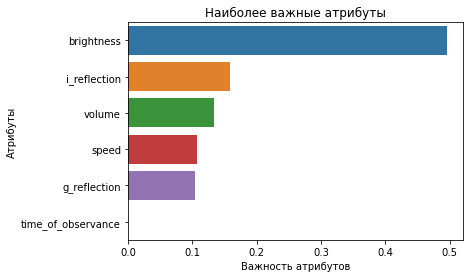

In [27]:
f, ax = plt.subplots()
sns.barplot(y=feature_importances_df.features, x=feature_importances_df.feature_importances)
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title('Наиболее важные атрибуты')
plt.show()

In [28]:
cosmo = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')


In [32]:
cosmo.head(20)

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1
5,206.6,13.0,27.2712,-0.233592,0,1,1,1
6,293.0,263.0,38.6760,-0.870781,0,1,1,1
7,83.1,205.0,10.9692,0.925809,0,1,1,1
8,53.0,305.0,6.9960,0.327122,0,1,1,1
9,35.1,189.0,4.6332,-0.726962,0,1,1,1


In [31]:
cosmo.groupby('buggers_were_noticed').agg({'dangerous': 'sum'})

,dangerous
buggers_were_noticed,
0,3702
1,86500


In [34]:
cosmo.groupby('nearby_system_has_planemo').agg({'dangerous': 'sum'})

,dangerous
nearby_system_has_planemo,
0,0
1,90202
